# E-Commerce Data Analysis (USING RFM)
- kaggle competition : https://www.kaggle.com/datasets/carrie1/ecommerce-data?resource=download

- dataset : 영국 소매업체의 2010/01/12 ~ 2011/09/12 간 전 세계 실제 전자상거래 data

- columns

| 컬럼명      | 컬럼정보  |
|-------------|-----------|
| InvoiceNo   | 송장 번호 |
| StockCode   | 주식 코드 |
| Description | 거래 정보 |
| Queantity   | 거래 수량 |
| InvoiceDate | 송장 일자 |
| UnitPrice   | 단가      |
| CustomerId  | 고객 ID   |
| Country     | 국가      | 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data.csv')

df.tail(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
# 결측치 처리

df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# CustomerID 가 null인 행만 삭제 (Description은 없어도 상관x)

df = df.dropna(subset = ['CustomerID'], axis = 0)

df.shape

(406829, 8)

### Recency (R)

In [7]:
# Date 컬럼 생성

import datetime as dt

df['date'] = pd.DatetimeIndex(df['InvoiceDate']).date

df.tail(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,2011-12-09


In [8]:
# Customer 별 최근 구매 날짜

recency_df = df.groupby(['CustomerID'], as_index = False)['date'].max()

recency_df = recency_df.rename({'date' : 'LastPurchaseDate'}, axis = 1)

recency_df

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4367,18280.0,2011-03-07
4368,18281.0,2011-06-12
4369,18282.0,2011-12-02
4370,18283.0,2011-12-06


In [9]:
# 날짜 범위 탐색

print('날짜 범위는 {0} 부터 {1} 까지입니다.'.format(df['date'].min(), df['date'].max()))

날짜 범위는 2010-12-01 부터 2011-12-09 까지입니다.


In [10]:
# 마지막 날짜를 오늘날짜로 지정

now = df['date'].max()

now

datetime.date(2011, 12, 9)

In [11]:
# 오늘로부터 최근 구매 날짜까지 일 수

recency_df['Recency'] = recency_df.LastPurchaseDate.apply(lambda x : (now - x).days)

recency_df

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
...,...,...,...
4367,18280.0,2011-03-07,277
4368,18281.0,2011-06-12,180
4369,18282.0,2011-12-02,7
4370,18283.0,2011-12-06,3


### Frequency (F)

In [12]:
# 원시 dataframe copy하여 사용

frequency_df = df.copy()

frequency_df.tail(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,2011-12-09


In [13]:
# 주문 건수(frequency) 만 파악, 한 제품 다량 구매 -> 1건으로 처리

frequency_df = frequency_df.drop_duplicates(['CustomerID', 'InvoiceNo'], keep = 'first', ignore_index = True)

frequency_df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date
22185,581583,20725,LUNCH BAG RED RETROSPOT,40,12/9/2011 12:23,1.45,13777.0,United Kingdom,2011-12-09
22186,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,12/9/2011 12:25,0.72,13777.0,United Kingdom,2011-12-09
22187,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,12/9/2011 12:31,0.39,15804.0,United Kingdom,2011-12-09
22188,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,12/9/2011 12:49,2.95,13113.0,United Kingdom,2011-12-09
22189,581587,22631,CIRCUS PARADE LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France,2011-12-09


In [14]:
# CustomerID 별 빈도수

frequency_df = frequency_df.groupby('CustomerID', as_index = False)['InvoiceNo'].count()

frequency_df = frequency_df.rename({'InvoiceNo' : 'Frequency'}, axis = 1)

frequency_df.tail(4)

,CustomerID,Frequency
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16
4371,18287.0,3


### Monetary (M)

In [15]:
# 총 주문 비용 = 단가 * 수량

df['Total_cost'] = df['UnitPrice'] * df['Quantity']

df.tail(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,Total_cost
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09,16.60
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,2011-12-09,14.85


In [16]:
# CutomerID 별 총 주문금액 -> monetary df 생성

monetary_df = df.groupby('CustomerID', as_index = False)['Total_cost'].sum()

monetary_df = monetary_df.rename({'Total_cost' : 'Monetary'}, axis = 1)

monetary_df

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


### RFM (R, F, M 결합)

In [17]:
# r + f merge

rf = recency_df.merge(frequency_df, on = 'CustomerID')

rf

,CustomerID,LastPurchaseDate,Recency,Frequency
0,12346.0,2011-01-18,325,2
1,12347.0,2011-12-07,2,7
2,12348.0,2011-09-25,75,4
3,12349.0,2011-11-21,18,1
4,12350.0,2011-02-02,310,1
...,...,...,...,...
4367,18280.0,2011-03-07,277,1
4368,18281.0,2011-06-12,180,1
4369,18282.0,2011-12-02,7,3
4370,18283.0,2011-12-06,3,16


In [18]:
# rf + m merge

rfm = rf.merge(monetary_df, on = 'CustomerID')

rfm

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18,325,2,0.00
1,12347.0,2011-12-07,2,7,4310.00
2,12348.0,2011-09-25,75,4,1797.24
3,12349.0,2011-11-21,18,1,1757.55
4,12350.0,2011-02-02,310,1,334.40
...,...,...,...,...,...
4367,18280.0,2011-03-07,277,1,180.60
4368,18281.0,2011-06-12,180,1,80.82
4369,18282.0,2011-12-02,7,3,176.60
4370,18283.0,2011-12-06,3,16,2094.88


In [20]:
# index 고객ID로 초기화

rfm = rfm.set_index('CustomerID')

rfm

,LastPurchaseDate,Recency,Frequency,Monetary
CustomerID,,,,
12346.0,2011-01-18,325,2,0.00
12347.0,2011-12-07,2,7,4310.00
12348.0,2011-09-25,75,4,1797.24
12349.0,2011-11-21,18,1,1757.55
12350.0,2011-02-02,310,1,334.40
...,...,...,...,...
18280.0,2011-03-07,277,1,180.60
18281.0,2011-06-12,180,1,80.82
18282.0,2011-12-02,7,3,176.60


In [21]:
# 최근 구매 일자 column 삭제

rfm = rfm.drop('LastPurchaseDate', axis = 1)

rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,18,1,1757.55
12350.0,310,1,334.40
...,...,...,...
18280.0,277,1,180.60
18281.0,180,1,80.82
18282.0,7,3,176.60


### Customer Segmentation

In [25]:
rfm.describe()

,Recency,Frequency,Monetary
count,4372.000000,4372.000000,4372.000000
mean,91.581199,5.075480,1898.459701
std,100.772139,9.338754,8219.345141
min,0.000000,1.000000,-4287.630000
25%,16.000000,1.000000,293.362500
50%,50.000000,3.000000,648.075000
75%,143.000000,5.000000,1611.725000
max,373.000000,248.000000,279489.020000


In [26]:
# 원시 df copy하여 사용 (유지보수)

rfm_segmentation = rfm.copy()

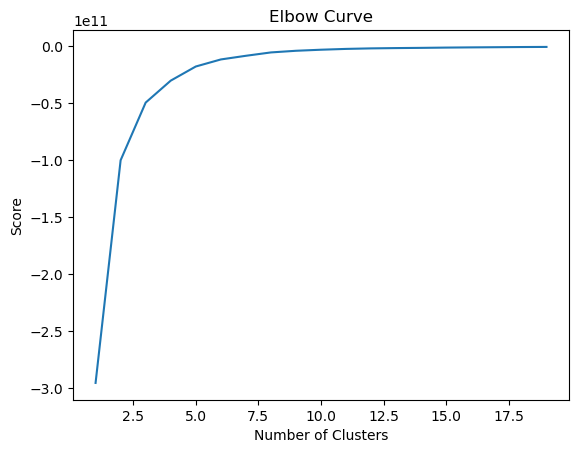

In [27]:
# Elbow Method (k Clustering)

from sklearn.cluster import KMeans

k = range(1, 20)

# list comprehension / k 만큼 Kmeans(클러스터 수 1 ~ 19)
kmeans = [KMeans(n_clusters = i) for i in k]

# list comprehension / k 만큼 Kmeans(클러스터 수 1 ~ 19)에 rfm table 학습 / 학습 된 score 산출
score = [kmeans[i].fit(rfm_segmentation).score(rfm_segmentation) for i in range(len(kmeans))]

plt.plot(k, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

plt.show()

In [29]:
# k = 3 일때 Elbow라 판단

kmeans = KMeans(n_clusters = 3, random_state = 42).fit(rfm_segmentation)

# 'cluster' 컬럼에 군집 번호(kmeans의 레이블) 입력

rfm_segmentation['cluster'] = kmeans.labels_

# check
rfm_segmentation

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
12346.0,325,2,0.00,0
12347.0,2,7,4310.00,0
12348.0,75,4,1797.24,0
12349.0,18,1,1757.55,0
12350.0,310,1,334.40,0
...,...,...,...,...
18280.0,277,1,180.60,0
18281.0,180,1,80.82,0
18282.0,7,3,176.60,0


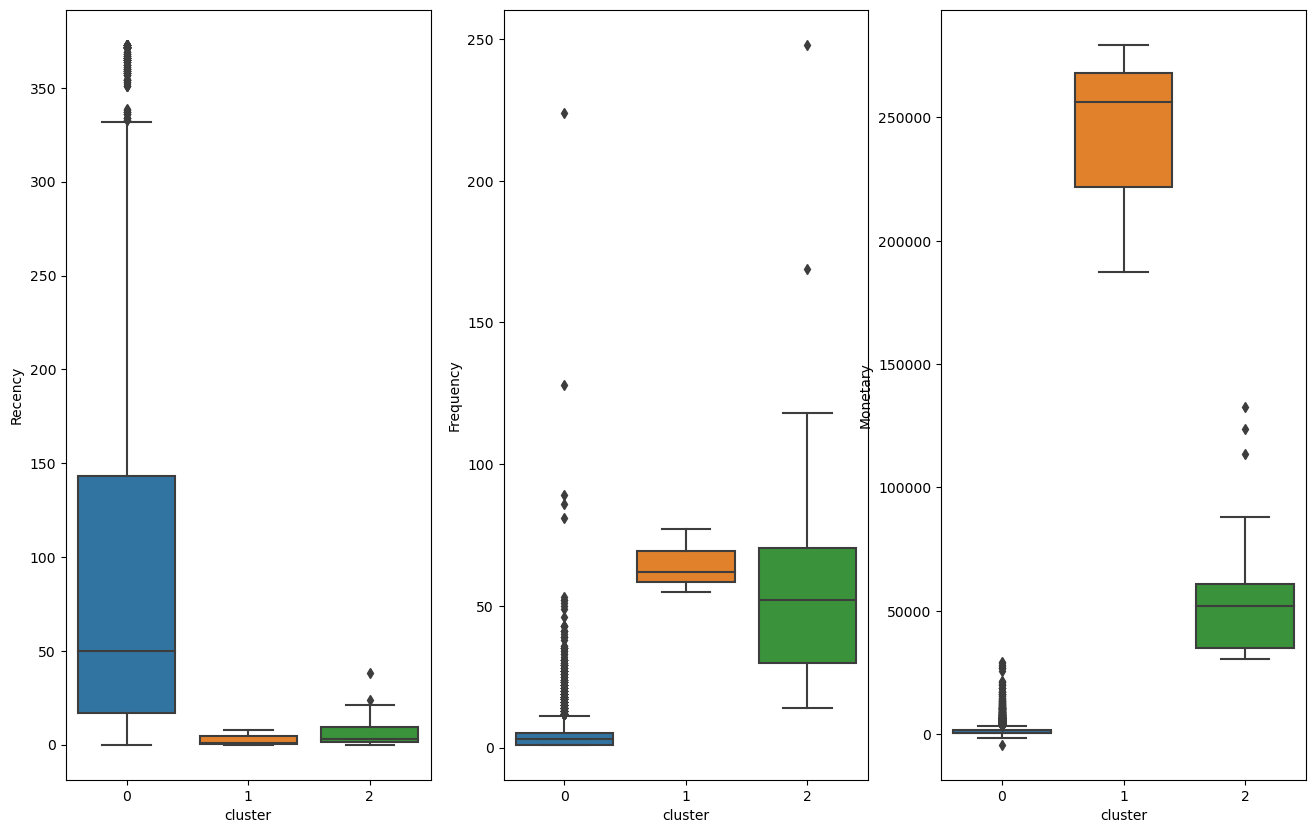

In [36]:
# boxplot으로 cluster label 별 R, F, M 비율 확인

plt.figure(figsize = (16,10))

plt.subplot(1,3,1)
sns.boxplot(x = rfm_segmentation['cluster'], y = rfm_segmentation['Recency'])

plt.subplot(1,3,2)
sns.boxplot(x = rfm_segmentation['cluster'], y = rfm_segmentation['Frequency'])

plt.subplot(1,3,3)
sns.boxplot(x = rfm_segmentation['cluster'], y = rfm_segmentation['Monetary'])

plt.show()

### cluster 별 특성
1. cluster 0 : **Silver** grade customer / long term recency, low frequency of purchase , Low consumption amount
2. cluster 1 : **Platinum** grade customer / short term recency, proper frequency of purchase , high consumption amount
3. cluster 2 : **Gold** grade customer / short term recency, proper frequency of purchase, proper consumtion amount